In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
path = "../datos/"

In [3]:
valores_x = np.linspace(0, 100, 100)
datos = pd.DataFrame(valores_x, columns = ["valores_x"])
datos["valores_y"] = np.sqrt(valores_x)
datos.head()

,valores_x,valores_y
0,0.000000,0.000000
1,1.010101,1.005038
2,2.020202,1.421338
3,3.030303,1.740777
4,4.040404,2.010076


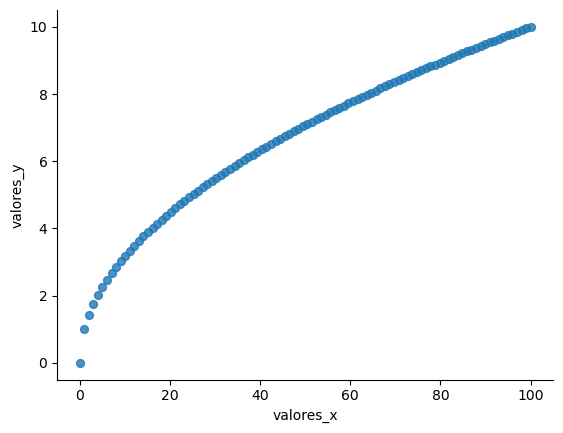

In [4]:
# @title valores_x vs valores_y

from matplotlib import pyplot as plt
datos.plot(kind='scatter', x='valores_x', y='valores_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

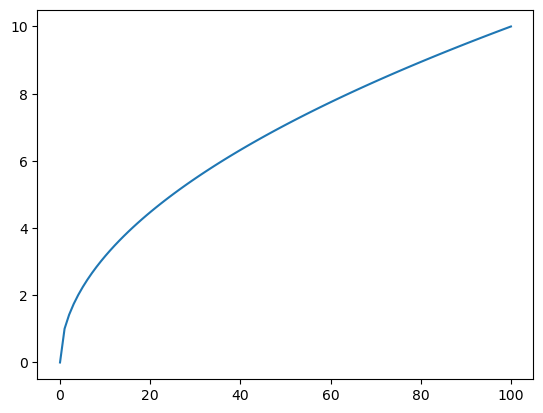

In [5]:
fig, ax = plt.subplots()
ax.plot( 'valores_x',  'valores_y', data = datos )
plt.show()

Para ajustar los ticks

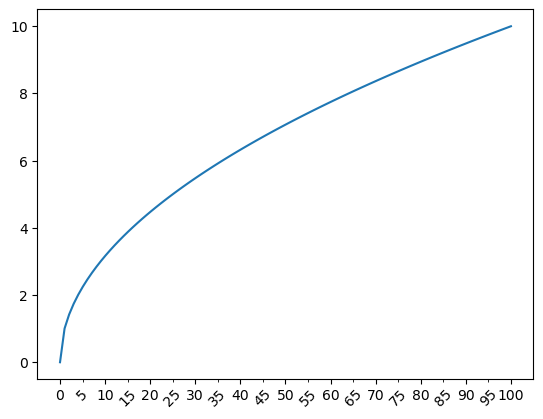

In [22]:
fig, ax = plt.subplots()
ax.plot( 'valores_x',  'valores_y', data = datos )
ax.set_xticks(list(range(0,101,10)))
ax.set_xticks(list(range(0,101,5)), minor = True, labels = list(range(0,101,5)))
# ax.set_xticks(list(range(0,101,5)), minor = True, labels = list(range(0,101,5)), rotation = 45.0)
plt.show()


# Fechas

Formato por defecto

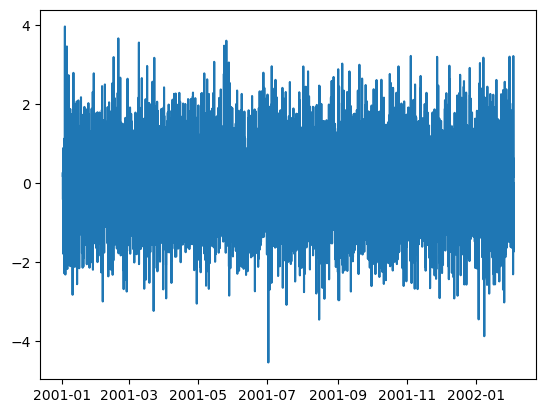

In [23]:
import numpy as np
import matplotlib.dates as mdates

times = np.arange(np.datetime64('2001-01-02'),
                  np.datetime64('2002-02-03'), np.timedelta64(75, 'm'))
y = np.random.randn(len(times))

fig, ax = plt.subplots()
ax.plot(times, y)

Formato conciso

In [24]:
len(times)

7623

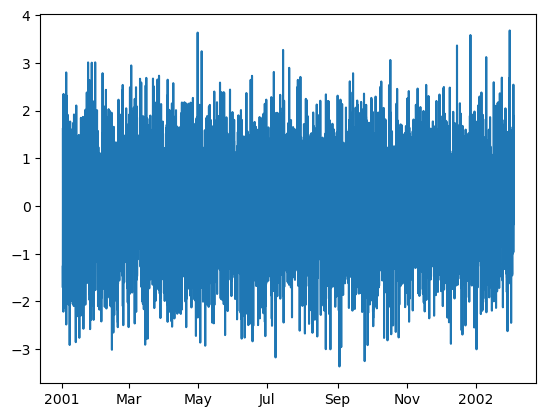

In [8]:
fig, ax = plt.subplots()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(times, y)

Localizador de meses

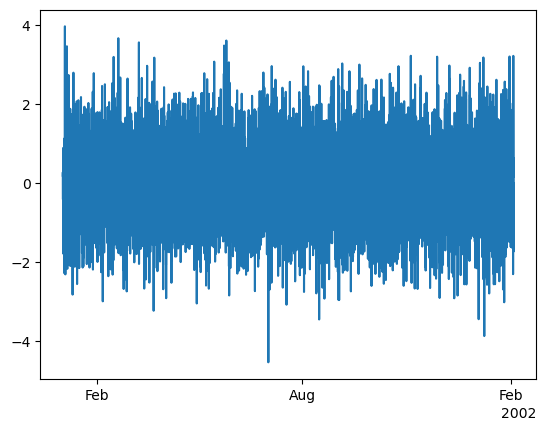

In [29]:
fig, ax = plt.subplots()
locator = mdates.MonthLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(times, y)

Localizador de meses con formato propio y rotación

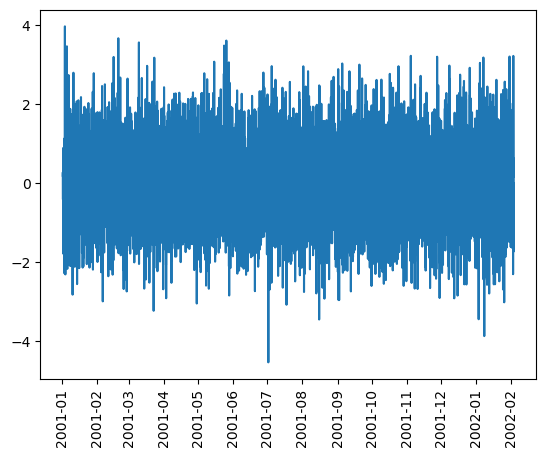

In [30]:
fig, ax = plt.subplots()
plt.xticks(rotation=90,horizontalalignment='center')
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.plot(times, y)
plt.show()

# Anotaciones

In [32]:
edades = pd.read_csv(path + "statage.csv", sep = ",")
edades.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,24.0,0.941524,86.452201,0.040322,79.910844,80.729773,81.991714,84.102892,86.452201,88.805249,90.926191,92.196879,93.022654
1,1,24.5,1.007208,86.861609,0.040396,80.260371,81.088685,82.364010,84.494706,86.861609,89.228048,91.357530,92.631767,93.459230
2,1,25.5,0.837251,87.652473,0.040578,81.005294,81.834452,83.113871,85.258877,87.652473,90.056755,92.229661,93.534066,94.382780
3,1,26.5,0.681493,88.423264,0.040723,81.734157,82.564061,83.847162,86.005173,88.423264,90.862604,93.076082,94.408849,95.277617
4,1,27.5,0.538780,89.175492,0.040833,82.448456,83.278986,84.565344,86.735069,89.175492,91.647114,93.898271,95.257541,96.145118


Buscamos la edad a la que hombres y mujeres superan el metro de media

In [33]:
edadesFiltrado = edades.query("M > 100 & Sex == 1")
# como el dataframe está ordenado por sexo y edad, después de filtrar la primera fila
# es la edad a la que se supera el metro
edad1mHombres = edadesFiltrado.iloc[0].Agemos
yHombres = edadesFiltrado.iloc[0].M

44.5

In [37]:
edadesFiltrado = edades.query("M > 100 & Sex == 2")
# como el dataframe está ordenado por sexo y edad, después de filtrar la primera fila
# es la edad a la que se supera el metro
edad1mMujeres = edadesFiltrado.iloc[0].Agemos
yMujeres = edadesFiltrado.iloc[0].M


47.5 100.4680516


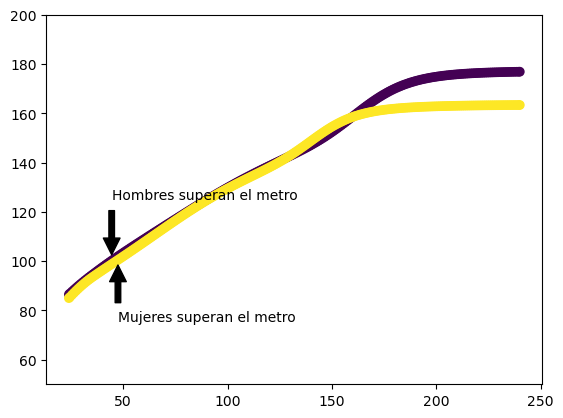

In [39]:

plt.scatter(edades.Agemos, edades.M, c = edades.Sex)
plt.ylim((50,200))
plt.annotate('Hombres superan el metro', xy=(edad1mHombres, yHombres), xytext=(edad1mHombres, yHombres+ 25),
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('Mujeres superan el metro', xy=(edad1mMujeres, yMujeres), xytext=(edad1mMujeres, yMujeres-  25),
            arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()